<a href="https://colab.research.google.com/github/MeenakshiAM/Handwriting-to-text-MINI-PROJECT-/blob/main/handwriting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **BASIC CNN MODEL**
1. *training using emnist dataset*

In [ ]:
!pip install torch torchvision torchaudio

In [ ]:
#importing necessary libraries
import torch
import torch.nn as nn
import torch.nn.functional as F


# **🏗️ Basic CNN Structure setup:**


1. Convolutional Layers – Detect features (edges, corners, shapes).
2. Pooling Layers – Reduce size while keeping important info.
3. Fully Connected Layers – Make final predictions.



In [ ]:
# Define a simple CNN
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 16, kernel_size=3, padding=1)  # 1 input channel, 16 filters
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, padding=1)  # 16 input, 32 filters
        self.pool = nn.MaxPool2d(2, 2)  # Pooling layer (2x2)

        self.fc1 = nn.Linear(32 * 7 * 7, 128)  # Fully connected layer
        self.fc2 = nn.Linear(128, 47)  # Output layer (47 classes for EMNIST Balanced)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))  # Conv1 + ReLU + Pooling
        x = self.pool(F.relu(self.conv2(x)))  # Conv2 + ReLU + Pooling
        x = torch.flatten(x, 1)  # Flatten dynamically
        x = F.relu(self.fc1(x))  # Fully connected layer
        x = self.fc2(x)  # Output layer
        return x

# Create model
model = SimpleCNN()
print(model)


SimpleCNN(
  (conv1): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=1568, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=47, bias=True)
)


✅ checking if things are done right or not....

In [ ]:
import torch
logits = torch.tensor([[-0.1098,  0.0793,  0.0812, -0.1365, -0.1020,  0.0101,  0.0475,  0.0103, 0.0627, -0.0469]])
probs = torch.softmax(logits, dim=1)
print(probs)


KeyboardInterrupt: 

# **📌  Load the EMNIST Dataset**

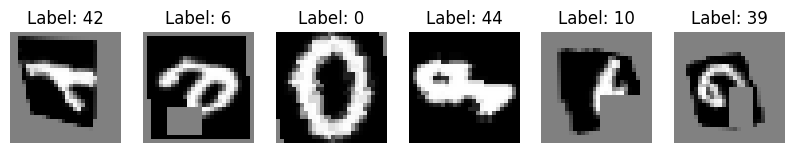

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from torch.utils.data import random_split

# Fixed Transformation Order
transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),  # Convert to grayscale
    transforms.ToTensor(),  # Convert to tensor FIRST (fixes error)
    transforms.Normalize((0.5,), (0.5,)),  # Normalize AFTER tensor conversion
    transforms.RandomRotation(15),  # Augmentations should follow ToTensor()
    transforms.RandomAffine(0, shear=15, scale=(0.7, 1.3)),
    transforms.RandomPerspective(distortion_scale=0.5, p=0.5),
    transforms.RandomErasing(p=0.5, scale=(0.02, 0.2))  # LAST step
])


# Load the EMNIST dataset (Balanced split: includes letters & digits)
trainset = torchvision.datasets.EMNIST(root='./data', split='balanced', train=True, download=True, transform=transform)
testset = torchvision.datasets.EMNIST(root='./data', split='balanced', train=False, download=True, transform=transform)


# Split dataset into 80% training and 20% validation
train_size = int(0.8 * len(trainset))
val_size = len(trainset) - train_size
trainset, valset = random_split(trainset, [train_size, val_size])

# Create DataLoaders
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True, num_workers=2)
valloader = torch.utils.data.DataLoader(valset, batch_size=64, shuffle=False, num_workers=2)  # Validation loader
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False, num_workers=2)

# Check the first batch
images, labels = next(iter(trainloader))

# Display some samples
fig, axes = plt.subplots(1, 6, figsize=(10, 5))
for i in range(6):
    axes[i].imshow(images[i].squeeze(), cmap='gray')
    axes[i].set_title(f"Label: {labels[i].item()}")  # Might need mapping for correct labels
    axes[i].axis('off')

plt.show()


# ***📋load retry***

100%|██████████| 562M/562M [00:40<00:00, 13.8MB/s]


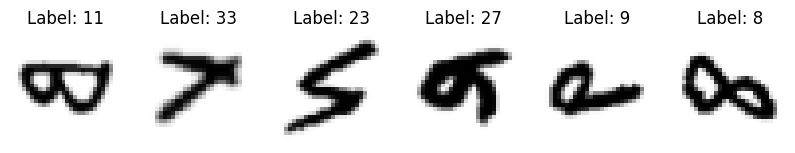

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# Custom Transform: Invert Colors
class Invert:
    def __call__(self, img):
        return transforms.functional.invert(img)

# Transformation: Convert to Tensor, Normalize, and Invert Colors
transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),  # Ensure it's grayscale
    Invert(),  # Invert colors
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))  # Normalize pixel values
])

# Load the EMNIST dataset (Balanced split)
trainset = torchvision.datasets.EMNIST(root='./data', split='balanced', train=True, download=True, transform=transform)
testset = torchvision.datasets.EMNIST(root='./data', split='balanced', train=False, download=True, transform=transform)

# Create DataLoaders
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)

# Check the first batch
images, labels = next(iter(trainloader))

# Display some samples
fig, axes = plt.subplots(1, 6, figsize=(10, 5))
for i in range(6):
    axes[i].imshow(images[i].squeeze(), cmap='gray')
    axes[i].set_title(f"Label: {labels[i].item()}")
    axes[i].axis('off')

plt.show()


# **checking if dataset is correct for training**
-includes the lables
rotations etc

In [ ]:
print(len(trainset), len(valset), len(testset))
print(trainset.dataset.classes)  # Should show 47 classes


NameError: name 'valset' is not defined

In [ ]:
import string

# Get all possible characters in EMNIST (uppercase + lowercase)
emnist_classes = list(string.ascii_uppercase + string.ascii_lowercase)

# Print a few sample labels and their corresponding characters
for label in [21, 24, 15, 23, 17, 18]:  # Replace this with actual batch labels
    if 0 <= label < len(emnist_classes):  # Check if label is valid
        print(f"Label: {label}, Character: {emnist_classes[label]}")
    else:
        print(f"Label: {label}, Character: UNKNOWN")


Label: 21, Character: V
Label: 24, Character: Y
Label: 15, Character: P
Label: 23, Character: X
Label: 17, Character: R
Label: 18, Character: S


In [ ]:
# Load EMNIST class mapping
import string

emnist_classes = list(string.digits + string.ascii_uppercase + string.ascii_lowercase)  # EMNIST class labels

# Check labels
for i, label in enumerate(labels[:6]):  # Display first 6 samples
    character = emnist_classes[label.item()]  # Map label to character
    print(f"Label: {label.item()}, Character: {character}")


Label: 23, Character: N
Label: 17, Character: H
Label: 26, Character: Q
Label: 0, Character: 0
Label: 15, Character: F
Label: 15, Character: F


In [ ]:
print(len(emnist_classes))  # Should print 47


52


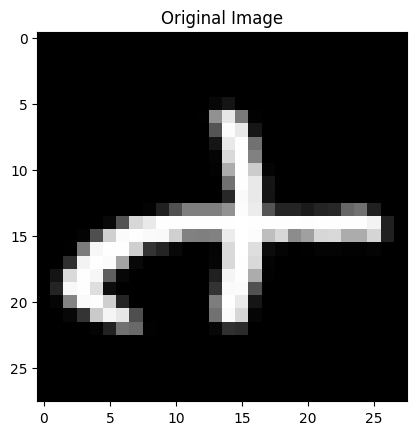

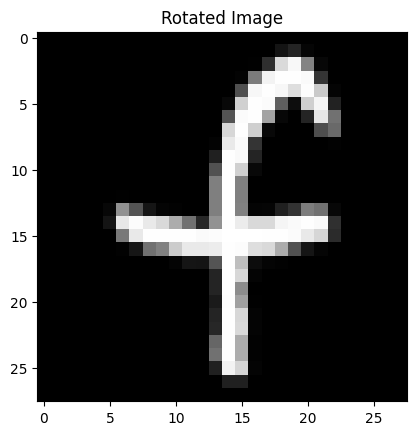

In [ ]:
import matplotlib.pyplot as plt
sample_images, _ = next(iter(trainloader))  # Get a batch of images

# Plot one image normally
plt.imshow(sample_images[0].squeeze(), cmap="gray")
plt.title("Original Image")
plt.show()

# Now plot rotated (90 degrees)
plt.imshow(sample_images[0].squeeze().T, cmap="gray")
plt.title("Rotated Image")
plt.show()


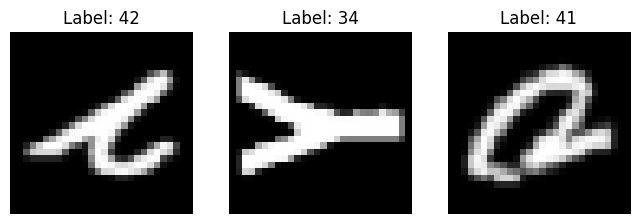

In [ ]:
# Get another batch of images
sample_images, sample_labels = next(iter(trainloader))

# Plot a few more images with their labels
fig, axes = plt.subplots(1, 3, figsize=(8, 3))
for i in range(3):
    axes[i].imshow(sample_images[i].squeeze(), cmap="gray")
    axes[i].set_title(f"Label: {sample_labels[i].item()}")
    axes[i].axis("off")
plt.show()


# ***🛠️ training of model begins here***

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

class SimpleCNN(nn.Module):
    def __init__(self, num_classes=47):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)

        self.pool = nn.MaxPool2d(2, 2)

        # Correct input size: 128 * 3 * 3 after conv3 + pooling
        self.fc1 = nn.Linear(128 * 3 * 3, 128)
        self.fc2 = nn.Linear(128, num_classes)

        self.dropout = nn.Dropout(0.5)  # Dropout to prevent overfitting

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))  # Fixed: Use conv3 instead of repeating conv1

        x = torch.flatten(x, 1)  # Flatten before FC layers
        x = F.relu(self.fc1(x))

        x = self.dropout(x)  # Apply dropout before final output
        x = self.fc2(x)

        return x


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

class SimpleCNN(nn.Module):
    def __init__(self, num_classes=47):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.dropout = nn.Dropout(0.6)  #  Add dropout with p=0.6
        self.fc1 = nn.Linear(64 * 7 * 7, 128)
        self.fc2 = nn.Linear(128, num_classes)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)  # Apply dropout before the final layer
        x = self.fc2(x)
        return x


In [ ]:
num_classes = 47  # Update with correct number of classes
model = SimpleCNN(num_classes=num_classes)  # Pass the correct number of classes
  # Loss function
criterion = nn.CrossEntropyLoss()
#optimizer = torch.optim.Adam(model.parameters(), lr=5e-5, weight_decay=1e-5)
optimizer = optim.Adam(model.parameters(), lr=0.0003)



In [ ]:
num_epochs = 15  # You can increase this for better results

for epoch in range(num_epochs):
    running_loss = 0.0

    for images, labels in trainloader:  # Training data batch
        optimizer.zero_grad()  # Reset gradients
        outputs = model(images)  # Forward pass
        loss = criterion(outputs, labels)  # Compute loss
        loss.backward()  # Backpropagation
        optimizer.step()  # Update weights

        running_loss += loss.item()

    print(f"Epoch {epoch+1}, Loss: {running_loss/len(trainloader)}")

print("Training complete! ")


Epoch 1, Loss: 1.393706482882129
Epoch 2, Loss: 0.6994039325705997
Epoch 3, Loss: 0.5909467739725546
Epoch 4, Loss: 0.5357176927819012
Epoch 5, Loss: 0.4988516792274644
Epoch 6, Loss: 0.46832181438930454
Epoch 7, Loss: 0.44501164455814113
Epoch 8, Loss: 0.4233342546566061
Epoch 9, Loss: 0.40728271488465845
Epoch 10, Loss: 0.39116481123191016
Epoch 11, Loss: 0.3827803080232726
Epoch 12, Loss: 0.37308075372393806
Epoch 13, Loss: 0.360587515511671
Epoch 14, Loss: 0.34982277267843365
Epoch 15, Loss: 0.34014619755444037
Training complete! 


In [ ]:
torch.save(model.state_dict(), "emnist_model.pth")
print(" Model saved successfully!")


 Model saved successfully!


In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for images, labels in testloader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

test_accuracy = 100 * correct / total
print(f"Test Accuracy: {test_accuracy:.2f}%")


Test Accuracy: 88.70%


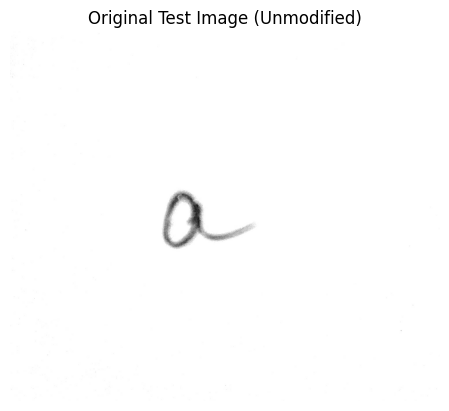

RuntimeError: mat1 and mat2 shapes cannot be multiplied (1x6558720 and 1152x128)

In [ ]:
import torch
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the test image (NO modifications at all)
image_path = "page_1_img_1.jpg"  # Make sure the path is correct
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Check if image is loaded
if img is None:
    raise ValueError("⚠️ Error: Image not loaded! Check the file path.")

# Convert to tensor & add batch + channel dimension (No resizing, no changes)
img_tensor = torch.tensor(img, dtype=torch.float32).unsqueeze(0).unsqueeze(0)

# Move tensor & model to same device
device = next(model.parameters()).device
img_tensor = img_tensor.to(device)
model.to(device)

# Show the **original** image (NO CHANGES!)
plt.imshow(img, cmap='gray')
plt.title("Original Test Image (Unmodified)")
plt.axis("off")
plt.show()

# Model prediction
model.eval()
with torch.no_grad():
    output = model(img_tensor)

# Get predicted class
predicted_class = torch.argmax(output, dim=1).item()

# EMNIST class mapping
emnist_classes = "0123456789ABCDEFGHIJKLMNOPQRSTUVWXYZabdefghnqrt"  # 47-class mapping
predicted_label = emnist_classes[predicted_class]

print("🔹 **Predicted Letter:**", predicted_label)


In [3]:
import torch
import cv2
import numpy as np

# Load model from Google Drive (Update the path)
model_path = "/content/drive/MyDrive/emnist_model.pth"
model = torch.load(model_path, map_location=torch.device('cpu'))  # Use 'cuda' if on GPU
model.eval()

def predict_image(image_path):
    """ Load image and pass directly to model (No modifications). """
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Load as grayscale

    if img is None:
        raise ValueError("⚠️ Error: Image not loaded! Check the file path.")

    # Convert to tensor & add batch dimension
    img_tensor = torch.tensor(img, dtype=torch.float32).unsqueeze(0).unsqueeze(0)

    # Move tensor to same device as model
    device = next(model.parameters()).device
    img_tensor = img_tensor.to(device)

    # Model prediction
    with torch.no_grad():
        output = model(img_tensor)

    # Get predicted class
    predicted_class = torch.argmax(output, dim=1).item()

    # EMNIST class mapping (47-class)
    emnist_classes = "0123456789ABCDEFGHIJKLMNOPQRSTUVWXYZabdefghnqrt"
    predicted_label = emnist_classes[predicted_class]

    return predicted_label

# Example usage:
image_path = "page_1_img_1.jpg"  # Change this to your image path
prediction = predict_image(image_path)
print("🔹 **Predicted Letter:**", prediction)


AttributeError: 'collections.OrderedDict' object has no attribute 'eval'

In [ ]:
import os
print(os.listdir())  # Lists all files in Colab's working directory


['.config', '.ipynb_checkpoints', 'page_2_img_1.jpeg', 'page_3_img_1.jpeg', 'drive', 'data', 'page_1_img_1.jpeg', 'sample_data']


# this part is made just to figure out the error


In [ ]:
print("Max label value:", max(labels))


Max label value: tensor(46)


In [ ]:
num_classes = len(set([label.item() for _, label in trainloader for label in labels]))
print("Number of classes in dataset:", num_classes)


Number of classes in dataset: 34


In [ ]:
print("Dataset classes:", len(trainset.classes))
print("Class mapping:", trainset.classes)


Dataset classes: 47
Class mapping: ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'a', 'b', 'd', 'e', 'f', 'g', 'h', 'n', 'q', 'r', 't']


In [ ]:
unique_labels = set()
for _, labels in trainloader:
    unique_labels.update(labels.tolist())

print("Unique labels found in dataset:", sorted(unique_labels))


Unique labels found in dataset: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46]


In [ ]:
print("Max label in batch:", labels.max().item())
print("Number of classes expected:", num_classes)  # Check your num_classes value


Max label in batch: 44
Number of classes expected: 34


In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


# test training

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")  #Define device
model.to(device)  #  Move model to GPU if available



SimpleCNN(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=1152, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=47, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
)

In [ ]:
import torch.nn.functional as F

# Get one batch of test images
images, labels = next(iter(testloader))
images, labels = images.to(device), labels.to(device)

# Get model predictions
with torch.no_grad():
    outputs = model(images)
    probs = F.softmax(outputs, dim=1)
    preds = torch.argmax(probs, dim=1)

# Print first 10 actual vs predicted labels
for i in range(10):
    print(f"True: {labels[i].item()}, Predicted: {preds[i].item()}")


True: 41, Predicted: 24
True: 39, Predicted: 24
True: 9, Predicted: 24
True: 26, Predicted: 24
True: 44, Predicted: 16
True: 33, Predicted: 40
True: 14, Predicted: 24
True: 11, Predicted: 24
True: 3, Predicted: 24
True: 12, Predicted: 16


In [ ]:
model.eval()  # Set model to evaluation mode
correct = 0
total = 0

with torch.no_grad():
    for images, labels in testloader:
        images, labels = images.to(device), labels.to(device)  # ✅ Move data to the same device
        outputs = model(images)  # ✅ No mismatch now
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

test_accuracy = 100 * correct / total
print(f"Test Accuracy: {test_accuracy:.2f}%")


Test Accuracy: 2.13%


In [ ]:
model.eval()  # Set model to evaluation mode
correct = 0
total = 0

with torch.no_grad():
    for images, labels in testloader:
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

test_accuracy = 100 * correct / total
print(f"Test Accuracy: {test_accuracy:.2f}%")


Test Accuracy: 2.16%


In [ ]:
torch.save(model.state_dict(), "emnist_model.pth")
print("Model saved successfully!")


Model saved successfully! ✅


In [ ]:
model.eval()  # Set to evaluation mode
misclassified = []

with torch.no_grad():
    for images, labels in testloader:
        outputs = model(images)
        _, preds = torch.max(outputs, 1)  # Get predicted class

        for i in range(len(labels)):
            if preds[i] != labels[i]:  # If prediction is wrong
                misclassified.append((labels[i].item(), preds[i].item()))

# Print first 10 misclassifications
for true_label, predicted_label in misclassified[:10]:
    print(f"True: {true_label}, Predicted: {predicted_label}")


RuntimeError: Input type (torch.FloatTensor) and weight type (torch.cuda.FloatTensor) should be the same or input should be a MKLDNN tensor and weight is a dense tensor